In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d

from skimage.filters import threshold_triangle
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages')
import os
import statsmodels.api as sm
import cv2
import matplotlib.patches as mpatches
import psutil
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.colors import Normalize


%matplotlib inline
plt.rcParams.update({'font.size': 20})

from sklearn.feature_extraction.image import grid_to_graph
from mpl_toolkits.axes_grid1 import ImageGrid
import json
from matplotlib.ticker import FuncFormatter

import nibabel as nib

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import itertools
import random
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

import pickle

In [2]:
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20201129_super_slices/cluster_labels.npy'
cluster_model_labels = np.load(labels_file) #z,t

In [3]:
main_dir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210131_temporal_glm/fly_087'

In [4]:
all_scores = []
shift = '150'
for z in range(49):
    file = [os.path.join(main_dir, i) for i in os.listdir(main_dir) if f'Z{z}' in i and f't{shift}' in i][0]
    with open(file, 'rb') as handle:
        scores = pickle.load(handle)
    all_scores.append(scores)

In [288]:
map_ = []
for z in range(49):
    colored_by_betas = np.zeros(256*128)
    for cluster_num in range(n_clusters):
        cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
        all_score = all_scores[z]['scores_all'][cluster_num]
        shift_score = all_scores[z]['scores_zpos_shift'][cluster_num]
        if all_score > 0.05: #.08
            colored_by_betas[cluster_indicies] = shift_score - all_score
        else:
            colored_by_betas[cluster_indicies] = 0
        if len(cluster_indicies) > 100:
            colored_by_betas[cluster_indicies] = 0
    colored_by_betas = colored_by_betas.reshape(256,128)
    colored_by_betas = scipy.ndimage.filters.gaussian_filter(colored_by_betas, sigma=4, truncate=5)
    map_.append(colored_by_betas)
map_ = np.asarray(map_)

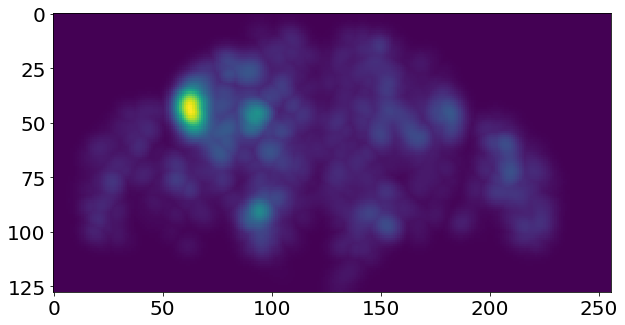

In [289]:
plt.figure(figsize=(10,10))
plt.imshow(np.max(map_,axis=0).T)

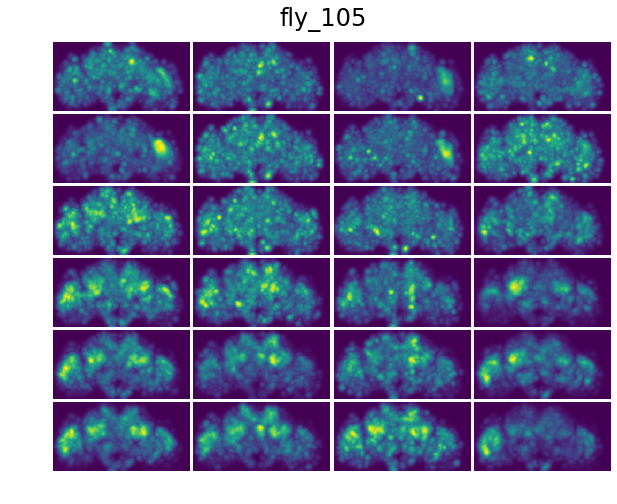

In [13]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 4), axes_pad=.05)
main_main_dir = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20210131_temporal_glm'
fly_names = ['fly_087', 'fly_089', 'fly_094', 'fly_095', 'fly_097', 'fly_098', 'fly_099', 'fly_100', 'fly_101', 'fly_105']
for fly in fly_names:
    idx = 0
    main_dir = os.path.join(main_main_dir, fly)
    for shift in [450,300,150,-150,-300,-450]:
        all_scores = []
        for z in range(49):
            file = [os.path.join(main_dir, i) for i in os.listdir(main_dir) if f'Z{z}' in i and f't{shift}' in i][0]
            with open(file, 'rb') as handle:
                scores = pickle.load(handle)
            all_scores.append(scores)

        for behavior in ['scores_walking_shift', 'scores_ypos_shift', 'scores_zpos_shift', 'scores_zneg_shift']:
            map_ = []
            for z in range(49):
                colored_by_betas = np.zeros(256*128)
                for cluster_num in range(n_clusters):
                    cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
                    all_score = all_scores[z]['scores_all'][cluster_num]
                    shift_score = all_scores[z][behavior][cluster_num]
                    if all_score > 0.05: #.08
                        colored_by_betas[cluster_indicies] = shift_score - all_score
                    else:
                        colored_by_betas[cluster_indicies] = 0
                    if len(cluster_indicies) > 100:
                        colored_by_betas[cluster_indicies] = 0
                colored_by_betas = colored_by_betas.reshape(256,128)
                colored_by_betas = scipy.ndimage.filters.gaussian_filter(colored_by_betas, sigma=4, truncate=5)
                map_.append(colored_by_betas)
            map_ = np.asarray(map_)
            grid[idx].imshow(np.max(map_,axis=0).T)
            grid[idx].axis('off')
            idx += 1
    plt.suptitle(fly,y=.85)
    save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
    timestr = time.strftime("%Y%m%d-%H%M%S")
    fname = os.path.join(save_path, f'{timestr}')
    plt.savefig(fname,dpi=300,bbox_inches='tight')

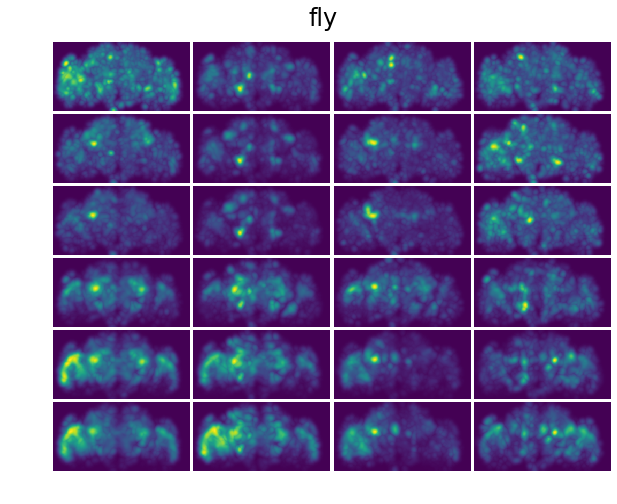

In [12]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 4), axes_pad=.05)
idx=0
for shift in [450,300,150,-150,-300,-450]:
    all_scores = []
    for z in range(49):
        file = [os.path.join(main_dir, i) for i in os.listdir(main_dir) if f'Z{z}' in i and f't{shift}' in i][0]
        with open(file, 'rb') as handle:
            scores = pickle.load(handle)
        all_scores.append(scores)

    for behavior in ['scores_walking_shift', 'scores_ypos_shift', 'scores_zpos_shift', 'scores_zneg_shift']:
        map_ = []
        for z in range(49):
            colored_by_betas = np.zeros(256*128)
            for cluster_num in range(n_clusters):
                cluster_indicies = np.where(cluster_model_labels[z,:]==cluster_num)[0]
                all_score = all_scores[z]['scores_all'][cluster_num]
                shift_score = all_scores[z][behavior][cluster_num]
                if all_score > 0.05: #.08
                    colored_by_betas[cluster_indicies] = shift_score - all_score
                else:
                    colored_by_betas[cluster_indicies] = 0
                if len(cluster_indicies) > 100:
                    colored_by_betas[cluster_indicies] = 0
            colored_by_betas = colored_by_betas.reshape(256,128)
            colored_by_betas = scipy.ndimage.filters.gaussian_filter(colored_by_betas, sigma=4, truncate=5)
            map_.append(colored_by_betas)
        map_ = np.asarray(map_)
        grid[idx].imshow(np.max(map_,axis=0).T)
        grid[idx].axis('off')
        idx += 1
plt.suptitle('fly',y=.85)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

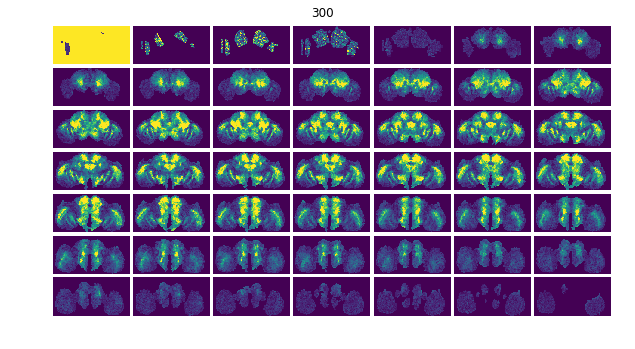

In [227]:
vmin = 0
vmax = .1 #.005

fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(7, 7), axes_pad=.05)
for z in range(49):
    grid[z].imshow(map_[z,:,:].T,vmin=vmin,vmax=vmax)
    grid[z].axis('off')

plt.suptitle(shift,y=.73,fontsize=12)
save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')

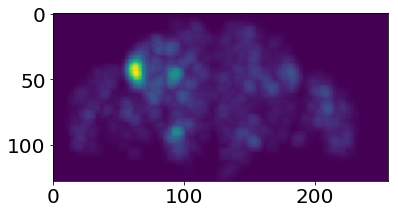

In [230]:
plt.imshow(np.max(map_,axis=0).T)

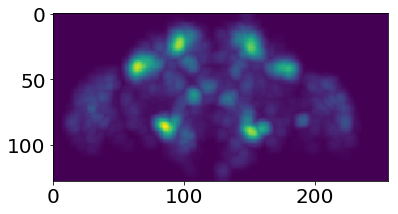

In [218]:
plt.imshow(np.max(map_,axis=0).T)

In [61]:
map_ = np.asarray(map_)

In [47]:
map_.shape

(49, 256, 128)

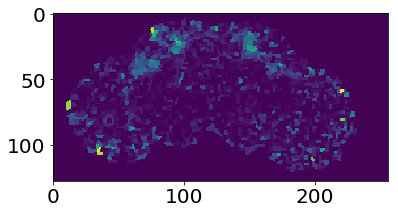

In [54]:
plt.imshow(map_[14,:,:].T)

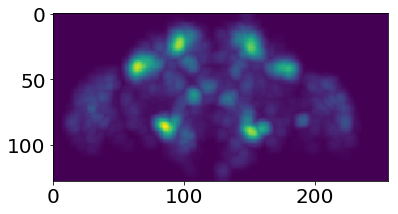

In [34]:
with open(files[3], 'rb') as handle:
    scores = pickle.load(handle)

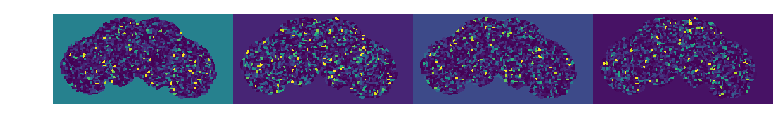

In [35]:
##############
### Shifts ###
##############
fig = plt.figure(figsize=(10,10))
vmin=0
vmax=.005
cmap='viridis'

ax = fig.add_axes([.25,-.13,.25,.25])
colored_by_betas = np.zeros(256*128)
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
    colored_by_betas[cluster_indicies] =  scores['scores_walking_shift'][cluster_num] - scores['scores_all'][cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)
ax.imshow(colored_by_betas.T,cmap=cmap,vmin=vmin,vmax=vmax)
ax.axis('off')

ax = fig.add_axes([.5,-.13,.25,.25])
colored_by_betas = np.zeros(256*128)
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores['scores_ypos_shift'][cluster_num] - scores['scores_all'][cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)
ax.imshow(colored_by_betas.T,cmap=cmap,vmin=vmin,vmax=vmax)
ax.axis('off')

ax = fig.add_axes([.75,-.13,.25,.25])
colored_by_betas = np.zeros(256*128)
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores['scores_zpos_shift'][cluster_num] - scores['scores_all'][cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)
ax.imshow(colored_by_betas.T,cmap=cmap,vmin=vmin,vmax=vmax)
ax.axis('off')

ax = fig.add_axes([1,-.13,.25,.25])
colored_by_betas = np.zeros(256*128)
for cluster_num in range(n_clusters):
    cluster_indicies = np.where(cluster_model_labels==cluster_num)[0]
    colored_by_betas[cluster_indicies] = scores['scores_zneg_shift'][cluster_num] - scores['scores_all'][cluster_num]
colored_by_betas = colored_by_betas.reshape(256,128)
ax.imshow(colored_by_betas.T,cmap=cmap,vmin=vmin,vmax=vmax)
ax.axis('off')

save_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/figs'
timestr = time.strftime("%Y%m%d-%H%M%S")
fname = os.path.join(save_path, f'{timestr}')
#plt.savefig(fname,dpi=300,bbox_inches='tight')